<a href="https://colab.research.google.com/github/suji2804/PyTorch/blob/main/03_pytorch_multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

X_test:tensor([[ 4.6583,  3.6496],
        [-8.2774,  7.0280],
        [-6.4799, -7.5315],
        [ 4.0021,  1.4422],
        [-0.9300,  9.7817],
        [-9.4508,  7.6850],
        [-5.2462, -8.0265],
        [-2.2851,  9.0269],
        [-8.4362, -7.3082],
        [-1.7707,  9.1857]])


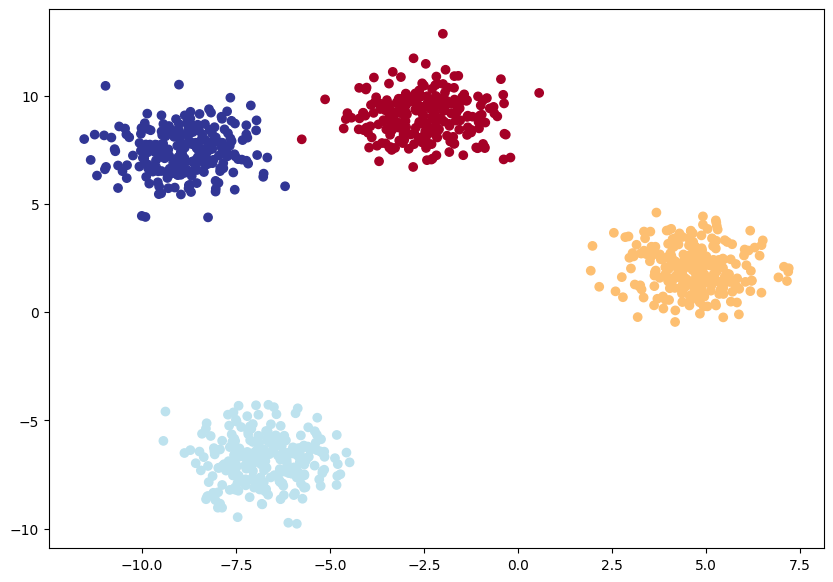

In [55]:
import torch
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#set the hyperparameters
RANDOM_SEED = 42
NUM_CLASSES = 4
NUM_FEATURES = 2

X, y = sklearn.datasets.make_blobs(n_samples=1000,
                                   n_features= NUM_FEATURES,
                                   centers= NUM_CLASSES,
                                   cluster_std=1.0,
                                   random_state= RANDOM_SEED)
#convert the data into tensors
X= torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)
X[:5],y[:5]

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=RANDOM_SEED)

# Convert X_test to float
X_test = X_test.type(torch.float)

X_train.shape,X_test.shape,y_train.shape,y_test.shape,y[:5]
print(f"X_test:{X_test[:10]}")
plt.figure(figsize=(10,7))
plt.scatter(X[:,0],X[:,1],c= y,cmap=plt.cm.RdYlBu);

In [56]:
from torch import nn
class BlobDataset(nn.Module):
  def __init__(self,input_features,output_features,hidden_units):
    super().__init__()
    self.layer_stack = nn.Sequential(nn.Linear(in_features=input_features,out_features=hidden_units),
                                     nn.Linear(in_features=hidden_units,out_features=hidden_units),
                                     nn.Linear(in_features =hidden_units,out_features=output_features))
  def forward(self,x):
    return self.layer_stack(x)

In [57]:
model = BlobDataset(input_features=NUM_FEATURES,
                      output_features=NUM_CLASSES,
                      hidden_units=8)
model

BlobDataset(
  (layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [58]:
#loss function and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.1)



In [59]:
model(X_train),model(X_train).shape,

(tensor([[-1.2096, -0.5905, -1.3977, -0.6999],
         [ 0.2225, -1.5206,  0.0469,  1.1367],
         [ 2.6882,  0.8213,  3.1033,  1.3287],
         ...,
         [ 0.0653, -1.5395, -0.1291,  1.0263],
         [ 2.3238,  0.6555,  2.6776,  1.1645],
         [ 2.0486, -1.0404,  2.1295,  2.2236]], grad_fn=<AddmmBackward0>),
 torch.Size([800, 4]))

In [60]:
model.eval()
with torch.inference_mode():
  y_pred = model(X_test)

y_pred[:10]
#why do we 4 valus because output features we gave as 4

tensor([[-1.1988, -0.6983, -1.4013, -0.6101],
        [ 1.7765, -1.2490,  1.7994,  2.1650],
        [ 2.2684,  0.7261,  2.6267,  1.0674],
        [-0.8950, -0.4057, -1.0242, -0.5896],
        [-0.2137, -1.5658, -0.4405,  0.8248],
        [ 2.0239, -1.3462,  2.0581,  2.4344],
        [ 1.9957,  0.8019,  2.3370,  0.7940],
        [ 0.1693, -1.4741, -0.0050,  1.0595],
        [ 2.7368,  0.6816,  3.1367,  1.4726],
        [ 0.0321, -1.4917, -0.1588,  0.9640]])

above outputs are raw outputs (logits)(hidden layer outputs)
we need to convert them to prediction probabilities by applying the activation function
here we will apply softmax.

softmax sums up all the values to 1, we will take argmax(index of maximum values)

In [61]:
y_pred_probs = torch.softmax(y_pred,dim=1)
y_pred_probs[:10],y_pred[:10]

(tensor([[0.1898, 0.3131, 0.1550, 0.3420],
         [0.2820, 0.0137, 0.2885, 0.4158],
         [0.3395, 0.0726, 0.4858, 0.1021],
         [0.2055, 0.3351, 0.1806, 0.2789],
         [0.2049, 0.0530, 0.1633, 0.5788],
         [0.2796, 0.0096, 0.2893, 0.4215],
         [0.3322, 0.1007, 0.4673, 0.0999],
         [0.2238, 0.0433, 0.1880, 0.5450],
         [0.3446, 0.0441, 0.5140, 0.0973],
         [0.2182, 0.0475, 0.1803, 0.5540]]),
 tensor([[-1.1988, -0.6983, -1.4013, -0.6101],
         [ 1.7765, -1.2490,  1.7994,  2.1650],
         [ 2.2684,  0.7261,  2.6267,  1.0674],
         [-0.8950, -0.4057, -1.0242, -0.5896],
         [-0.2137, -1.5658, -0.4405,  0.8248],
         [ 2.0239, -1.3462,  2.0581,  2.4344],
         [ 1.9957,  0.8019,  2.3370,  0.7940],
         [ 0.1693, -1.4741, -0.0050,  1.0595],
         [ 2.7368,  0.6816,  3.1367,  1.4726],
         [ 0.0321, -1.4917, -0.1588,  0.9640]]))

convert prediction probabilities to prediction labels


In [62]:
y_pred_labels = torch.argmax(y_pred_probs,dim=1)
y_pred_labels[:10],y_test[:10]

(tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3]),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]))

see above output its similar to y_test now, however we need to train the model to predict accurately

In [65]:
#traing loop and testing loop
torch.manual_seed(42)
epochs = 100
for epoch in range(epochs):
  y_logits = model(X_train)
  y_pred = torch.softmax(y_logits,dim=1)
  y_pred_labels = torch.argmax(y_pred,dim=1)

  loss = loss_fn(y_logits,y_train)
  acc = (y_pred_labels == y_train).sum()/len(y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #testing loop
  model.eval()
  with torch.inference_mode():
    test_logits = model(X_test)
    test_pred = torch.softmax(test_logits,dim=1)
    test_pred_lables = torch.argmax(test_pred,dim=1)
    test_loss = loss_fn(test_logits,y_test)
    test_acc = (test_pred_lables == y_test).sum()/len(y_test)

  if epoch %10 ==0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f} | acc : {acc:.5f}, test_loss:{test_loss:.4f} | test_acc :{test_acc:.5f}")





Epoch: 0 | Loss: 0.0083 | acc : 0.99875, test_loss:0.0065 | test_acc :1.00000
Epoch: 10 | Loss: 0.0076 | acc : 0.99875, test_loss:0.0059 | test_acc :1.00000
Epoch: 20 | Loss: 0.0070 | acc : 0.99875, test_loss:0.0053 | test_acc :1.00000
Epoch: 30 | Loss: 0.0066 | acc : 0.99875, test_loss:0.0049 | test_acc :1.00000
Epoch: 40 | Loss: 0.0062 | acc : 0.99875, test_loss:0.0045 | test_acc :1.00000
Epoch: 50 | Loss: 0.0058 | acc : 0.99875, test_loss:0.0042 | test_acc :1.00000
Epoch: 60 | Loss: 0.0055 | acc : 0.99875, test_loss:0.0039 | test_acc :1.00000
Epoch: 70 | Loss: 0.0052 | acc : 0.99875, test_loss:0.0037 | test_acc :1.00000
Epoch: 80 | Loss: 0.0050 | acc : 0.99875, test_loss:0.0035 | test_acc :1.00000
Epoch: 90 | Loss: 0.0048 | acc : 0.99875, test_loss:0.0033 | test_acc :1.00000


In [67]:
# Calculate accuracy on the test set
accuracy = (test_pred_lables == y_test).sum()/len(y_test)
accuracy

tensor(1.)

In [68]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

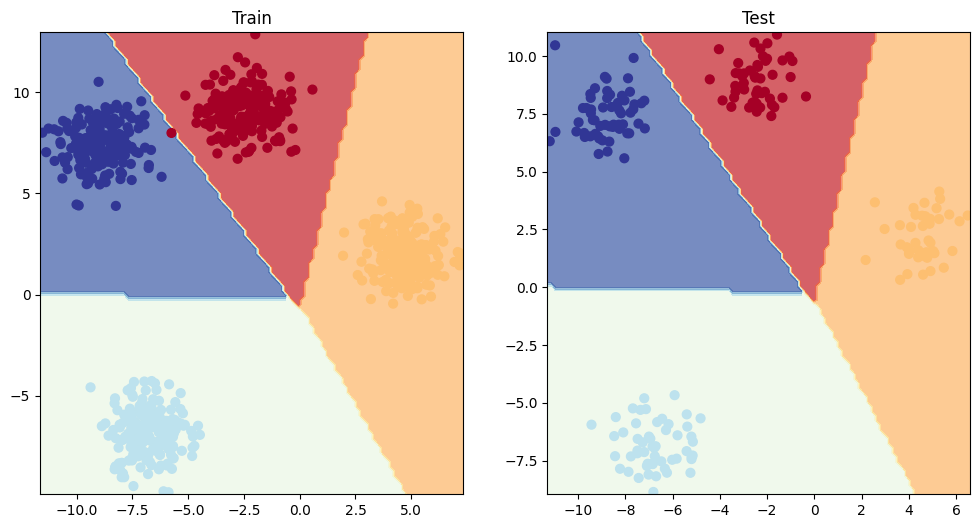

In [69]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)